In [7]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [102]:
X , Y = datasets.make_regression(n_samples=100, n_features=1, noise=30, random_state=5)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)




In [103]:
#y = wx + b  #weights, bias

#mean squared error - 1/n * (actual - predicted)^2
#different errors could be used depending on application
# want to minimise error
# use gradient descent to find minimum

import numpy as np
import cmath



class LinearRegression:

  def __init__(self, learn = 0.001, n_itr = 1000):
    self.learn = learn
    self.n_itr = n_itr
    self.weights = None
    self.bias = None

  def fitting(self, X, Y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

        #inner product for all samples rather than looping
    for times in range(self.n_itr):
      predicted = np.dot(X, self.weights) + self.bias
      dw = 1/n_samples * np.dot(X.T, (predicted - Y))
      db = 1/n_samples * np.sum(predicted - Y)
      #we want to travel opposite to grad vector
      self.weights = self.weights - self.learn * dw
      self.bias = self.bias - self.learn * db



  def predicted(self, X):
      predicted = np.dot(X, self.weights) + self.bias
      return predicted





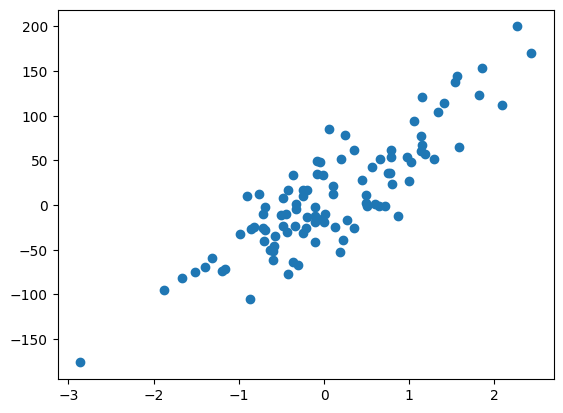

In [104]:
plt.figure()
plt.scatter(X, Y)

In [105]:
model = LinearRegression(learn = 0.001)
model.fitting(X_train, Y_train)
predictions = model.predicted(X_test)

def mse(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

mse_value = mse(Y_test, predictions)
print(mse_value)





1209.8176776333703


In [106]:
model2 = LinearRegression(learn = 0.01)
model2.fitting(X_train, Y_train)
predictions2 = model2.predicted(X_test)

def mse(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

mse_value = mse(Y_test, predictions2)
print(mse_value)

1168.044087401238


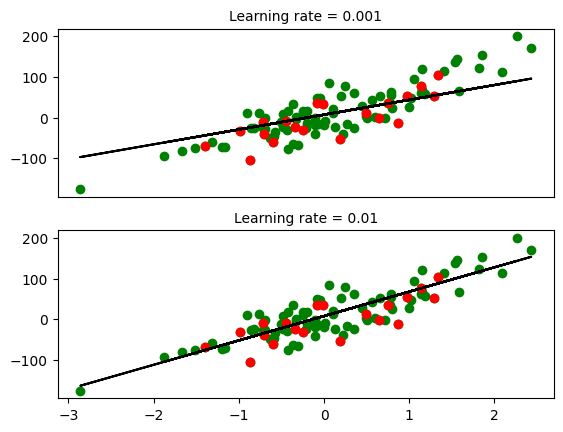

In [ ]:
y_pred_line = model.predicted(X)
fig, axs = plt.subplots(2, 1)  # Unpack the tuple into fig and axs
axs[0].plot(X, y_pred_line, color='black')
axs[0].scatter(X, Y, color = 'green', label = 'trained')
axs[0].scatter(X_test, Y_test, color = 'red' , label = 'test')
axs[0].set_title('Learning rate = 0.001', size = 10)


y_pred2_line = model2.predicted(X)
axs[1].plot(X, y_pred2_line, color='black')
axs[1].scatter(X, Y, color = 'green', label = 'trained')
axs[1].scatter(X_test, Y_test, color = 'red' , label = 'test')
axs[1].set_title('Learning rate = 0.01', size= 10)
axs[0].tick_params(axis='x', which='both',
                bottom=False, labelbottom=False)

plt.show()

#learning rate of 0.001 must be too slow - not enough iterations to find minimum of the errors